@khadim mbacke ndiaye

In [396]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import math as m
import plotly.graph_objects as go

In [397]:
terror=pd.read_csv('/Volumes/bamba/globalterrorismdb_0718dist.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [398]:
terror

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [345]:
terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [346]:
terror['latitude']

0         18.456792
1         19.371887
2         15.478598
3         37.997490
4         33.580412
            ...    
181686     2.359673
181687    35.407278
181688     6.900742
181689    24.798346
181690     7.209594
Name: latitude, Length: 181691, dtype: float64

In [347]:
terror.shape

(181691, 135)

In [348]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [349]:
def valeur_manquantes(data):
    total_missing = data.isnull().sum()[data.isnull().sum() != 0]
    percent_missing = round((data.isnull().sum().sort_values()[data.isnull().sum() != 0] / len(data)) * 100, 4)

    return pd.concat([total_missing, percent_missing], axis=1,  keys=['Total de valeurs manquantes','Percentage de valeurs manquantes'])

In [350]:
missing_features = valeur_manquantes(terror)
missing_features

,Total de valeurs manquantes,Percentage de valeurs manquantes
approxdate,172452,94.9150
resolution,179471,98.7781
provstate,421,0.2317
city,434,0.2389
latitude,4556,2.5076
...,...,...
addnotes,153402,84.4302
scite1,66191,36.4305
scite2,104758,57.6572
scite3,138175,76.0494


In [351]:
missing_percentages = terror.isna().sum().sort_values(ascending = False)/len(terror)
missing_percentages

gsubname3           0.999890
weapsubtype4_txt    0.999615
weapsubtype4        0.999615
weaptype4           0.999598
weaptype4_txt       0.999598
                      ...   
suicide             0.000000
success             0.000000
crit3               0.000000
property            0.000000
eventid             0.000000
Length: 135, dtype: float64

In [352]:
val_manquantes = terror[terror.isnull().any(axis=1)]
val_manquantes

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [353]:
pourc_val_man=missing_features['Percentage de valeurs manquantes']

In [354]:
#liste des colonnes ayant plus de 20 pourcent de valeurs manquantes
liste_empty_columns = list(missing_percentages[missing_percentages > 0.20].index.values)

In [355]:
liste_empty_columns

['gsubname3',
 'weapsubtype4_txt',
 'weapsubtype4',
 'weaptype4',
 'weaptype4_txt',
 'claimmode3',
 'claimmode3_txt',
 'gsubname2',
 'claim3',
 'guncertain3',
 'gname3',
 'divert',
 'attacktype3',
 'attacktype3_txt',
 'ransomnote',
 'ransompaidus',
 'ransomamtus',
 'claimmode2',
 'claimmode2_txt',
 'ransompaid',
 'corp3',
 'targsubtype3',
 'targsubtype3_txt',
 'natlty3_txt',
 'natlty3',
 'target3',
 'targtype3',
 'targtype3_txt',
 'ransomamt',
 'weapsubtype3_txt',
 'weapsubtype3',
 'weaptype3_txt',
 'weaptype3',
 'claim2',
 'guncertain2',
 'gname2',
 'resolution',
 'kidhijcountry',
 'nhours',
 'compclaim',
 'gsubname',
 'attacktype2',
 'attacktype2_txt',
 'ndays',
 'approxdate',
 'corp2',
 'nreleased',
 'targsubtype2',
 'targsubtype2_txt',
 'natlty2',
 'natlty2_txt',
 'hostkidoutcome_txt',
 'hostkidoutcome',
 'target2',
 'targtype2_txt',
 'targtype2',
 'weapsubtype2',
 'weapsubtype2_txt',
 'weaptype2',
 'weaptype2_txt',
 'nhostkidus',
 'nhostkid',
 'claimmode_txt',
 'claimmode',
 'rela

In [356]:
terror.drop(liste_empty_columns,inplace=True,axis=1)

In [357]:
terror.head(15)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
5,197001010002,1970,1,1,0,217,United States,1,North America,Illinois,...,Unknown Gun Type,0.0,0.0,1,0.0,Hewitt Project,-9,-9,0,-9
6,197001020001,1970,1,2,0,218,Uruguay,3,South America,Montevideo,...,Automatic or Semi-Automatic Rifle,0.0,0.0,0,0.0,PGIS,0,0,0,0
7,197001020002,1970,1,2,0,217,United States,1,North America,California,...,Unknown Explosive Type,0.0,0.0,1,0.0,Hewitt Project,-9,-9,0,-9
8,197001020003,1970,1,2,0,217,United States,1,North America,Wisconsin,...,Molotov Cocktail/Petrol Bomb,0.0,0.0,1,0.0,Hewitt Project,0,0,0,0
9,197001030001,1970,1,3,0,217,United States,1,North America,Wisconsin,...,Gasoline or Alcohol,0.0,0.0,1,0.0,Hewitt Project,0,0,0,0


In [358]:
terror.shape

(181691, 47)

In [359]:
val_manquantes = valeur_manquantes(terror)
val_manquantes

,Total de valeurs manquantes,Percentage de valeurs manquantes
provstate,421,0.2317
city,434,0.2389
latitude,4556,2.5076
longitude,4557,2.5081
specificity,6,0.0033
doubtterr,1,0.0006
multiple,1,0.0006
targsubtype1,10373,5.7091
targsubtype1_txt,10373,5.7091
target1,636,0.3500


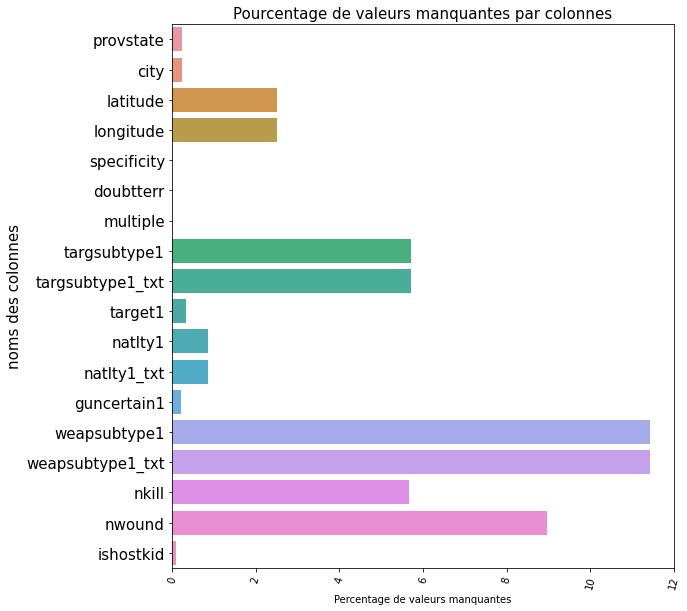

In [360]:
plt.figure(figsize=(9,10))
plt.xticks(rotation=75)
plt.yticks(fontsize=15)
plt.title("Pourcentage de valeurs manquantes par colonnes",fontsize=15)
b = sns.barplot(x=val_manquantes['Percentage de valeurs manquantes'], y=val_manquantes['Percentage de valeurs manquantes'].index);
b.set_ylabel("noms des colonnes",fontsize=15)
b.set_xlabel("Percentage de valeurs manquantes",fontsize=10)

plt.show()

In [361]:
#suppression des colonnes redondantes
listecolumns =  ['country','targsubtype1','region','weaptype1','natlty1','weapsubtype1']
terror.drop(listecolumns,inplace=True,axis=1)

In [362]:
terror

,eventid,iyear,imonth,iday,extended,country_txt,region_txt,provstate,city,latitude,...,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,...,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,Mexico,North America,Federal,Mexico city,19.371887,...,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,...,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,Greece,Western Europe,Attica,Athens,37.997490,...,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,Japan,East Asia,Fukouka,Fukouka,33.580412,...,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,...,Unknown Gun Type,1.0,2.0,-9,0.0,START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,...,"Projectile (rockets, mortars, RPGs, etc.)",2.0,7.0,1,0.0,START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,...,Arson/Fire,0.0,0.0,1,0.0,START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,India,South Asia,Manipur,Imphal,24.798346,...,Grenade,0.0,0.0,-9,0.0,START Primary Collection,-9,-9,0,-9


In [363]:
terror.shape

(181691, 41)

In [364]:
#statistiques
terror.describe()

,eventid,iyear,imonth,iday,extended,latitude,longitude,specificity,vicinity,crit1,...,guncertain1,individual,nkill,nwound,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,...,181311.000000,181691.000000,171378.000000,165380.000000,181691.000000,181513.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,...,0.081440,0.002950,2.403272,3.167668,-0.544556,0.059054,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,18.569242,2.047790e+05,0.995430,0.284553,0.106483,...,0.273511,0.054234,11.545741,35.949392,3.122889,0.461244,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,11.510046,4.545640e+00,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,31.467463,4.324651e+01,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,34.685087,6.871033e+01,1.000000,0.000000,1.000000,...,0.000000,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,74.633553,1.793667e+02,5.000000,1.000000,1.000000,...,1.000000,1.000000,1570.000000,8191.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [365]:
#matrice de correlation
terror.corr()

,eventid,iyear,imonth,iday,extended,latitude,longitude,specificity,vicinity,crit1,...,guncertain1,individual,nkill,nwound,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,0.166886,0.003907,0.030641,0.070646,0.002019,...,0.040647,0.017939,0.015351,0.015282,-0.278927,-0.010146,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,0.166933,0.003917,0.030626,0.070659,0.001995,...,0.040656,0.017944,0.015341,0.015273,-0.278916,-0.010159,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.015978,-0.003880,0.003621,-0.004501,0.001568,...,-0.004460,-0.001661,0.003463,0.002938,-0.005816,0.003397,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003423,-0.002285,-0.006991,-0.005367,0.011434,...,-0.002186,-0.003788,-0.003693,-0.001268,-0.003903,0.004077,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.024749,0.000523,0.057897,0.017784,-0.015029,...,0.033464,-0.008929,0.027737,-0.006627,-0.002096,0.326351,0.071768,0.075147,0.027335,0.080767
latitude,0.166886,0.166933,-0.015978,0.003423,-0.024749,1.000000,0.001463,-0.018811,0.005844,0.021533,...,-0.064413,0.040649,-0.018124,0.015988,-0.084537,-0.022468,-0.099827,-0.094470,0.097652,-0.041530
longitude,0.003907,0.003917,-0.003880,-0.002285,0.000523,0.001463,1.000000,0.001065,0.000594,-0.000258,...,0.000724,0.000114,-0.000562,0.000223,-0.001231,0.000295,0.002272,0.002268,0.000371,0.002497
specificity,0.030641,0.030626,0.003621,-0.006991,0.057897,-0.018811,0.001065,1.000000,-0.049855,0.014323,...,-0.009168,-0.022631,0.022335,-0.015764,0.028111,0.016048,0.073022,0.071333,-0.019197,0.061389
vicinity,0.070646,0.070659,-0.004501,-0.005367,0.017784,0.005844,0.000594,-0.049855,1.000000,0.003330,...,0.031177,-0.011986,0.013836,-0.002435,-0.019811,0.004626,0.014487,0.015119,-0.008232,0.010325
crit1,0.002019,0.001995,0.001568,0.011434,-0.015029,0.021533,-0.000258,0.014323,0.003330,1.000000,...,0.013568,-0.025591,0.010834,0.006790,-0.007595,-0.015465,0.089973,0.089888,0.015692,0.082288


In [366]:
group_terr=pd.DataFrame({"nombre d'attentats par groupe terroriste":terror['gname'].value_counts().head(20)})
group_terr

,nombre d'attentats par groupe terroriste
Unknown,82782
Taliban,7478
Islamic State of Iraq and the Levant (ISIL),5613
Shining Path (SL),4555
Farabundo Marti National Liberation Front (FMLN),3351
Al-Shabaab,3288
New People's Army (NPA),2772
Irish Republican Army (IRA),2671
Revolutionary Armed Forces of Colombia (FARC),2487
Boko Haram,2418


In [367]:
att_reg=pd.DataFrame({"nombre d'attentats par region":terror['region_txt'].value_counts()})

In [368]:
att_reg

,nombre d'attentats par region
Middle East & North Africa,50474
South Asia,44974
South America,18978
Sub-Saharan Africa,17550
Western Europe,16639
Southeast Asia,12485
Central America & Caribbean,10344
Eastern Europe,5144
North America,3456
East Asia,802


In [369]:
type_arme=pd.DataFrame({"type d'arme":terror['weaptype1_txt'].value_counts()})
type_arme

,type d'arme
Explosives,92426
Firearms,58524
Unknown,15157
Incendiary,11135
Melee,3655
Chemical,321
Sabotage Equipment,141
"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",136
Other,114
Biological,35


In [372]:
terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country_txt',
       'region_txt', 'provstate', 'city', 'latitude', 'longitude',
       'specificity', 'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr',
       'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1_txt', 'target1',
       'natlty1_txt', 'gname', 'guncertain1', 'individual', 'weaptype1_txt',
       'weapsubtype1_txt', 'nkill', 'nwound', 'property', 'ishostkid',
       'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

#### Colonnes a analysées


In [393]:
terror_clean=terror[['iyear', 'imonth', 'iday', 'country_txt',
       'region_txt', 'city', 'latitude', 'longitude',
         'attacktype1_txt',
        'targtype1_txt', 'targsubtype1_txt', 'target1',
       'natlty1_txt', 'gname', 'weaptype1_txt',
       'weapsubtype1_txt', 'nkill', 'nwound'
       ]]

In [394]:
terror_clean

,iyear,imonth,iday,country_txt,region_txt,city,latitude,longitude,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,natlty1_txt,gname,weaptype1_txt,weapsubtype1_txt,nkill,nwound
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,Dominican Republic,MANO-D,Unknown,NaN,1.0,0.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",Belgium,23rd of September Communist League,Unknown,NaN,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,United States,Unknown,Unknown,NaN,1.0,0.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,United States,Unknown,Explosives,Unknown Explosive Type,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,United States,Unknown,Incendiary,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,Military,Military Checkpoint,Checkpoint,Somalia,Al-Shabaab,Firearms,Unknown Gun Type,1.0,2.0
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Hmeymim Air Base,Russia,Muslim extremists,Explosives,"Projectile (rockets, mortars, RPGs, etc.)",2.0,7.0
181688,2017,12,31,Philippines,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Houses,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,Arson/Fire,0.0,0.0
181689,2017,12,31,India,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,Government (General),Government Building/Facility/Office,Office,India,Unknown,Explosives,Grenade,0.0,0.0
